# SNLP Assignment 1

Name 1: William LaCroix<br/>
Student id 1: 7038732<br/>
Email 1: williamplacroix@gmail.com<br/>


Name 2: Nicholas Jennings<br/>
Student id 2: 2573492<br/>
Email 2: s8nijenn@stud.uni-saarland.de<br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercise 2,  and the bonus question (if you attempt it). There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after your upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 (3 = 1+2 points)
Let's revise probability, here are some notations used in this exercise: 
- $S$: Sample Space
- Uni-gram: One token/letter i.e. $a, b, c$
- Bi-gram: Two tokens/letters i.e. $(a,b), (b,c), (c,d)$
- $p(x,y)$: Probability of $x$ followed by $y$
- $pR(x)$: Probability of $x$ being the right hand bi-gram member i.e. bi-grams like $(z,x), (a,x), (x,x)$
- $pL(x)$: Probability of $x$ being the left hand bi-gram member i.e. bi-grams like $(x,y), (x,p), (x,n)$

Let $S = { a, b, c }$ and $p$ be the joint distribution on a sequence of two events (i.e. on $S$ x $S$, ordered). If you know that 
- $p(a,a)$ = 0.25, 
- $p(c,c)$ = 0.25, 
- $p(b,a)$ = 0.125, 
- $p(b,b)$ = 0, 
- $p(a,c)$ = 0.25, 
- $pL(a)$ [unigram probability of a as a left-hand bigram member] = .5, 
- $pR(b)$ [unigram probability of b as the right-hand bigram member] = 0.125

is it enough to compute p(b|c) (i.e., the probability of seeing b if we already know that the preceding event generated c)? Justify your answer. (3-5 sentences) Please use $\LaTeX$ styling for equations.


### Answer:

- $p(a,a)$ = 0.25
- $p(a,b)$ = ? $\to$ 0 (H1)
- $p(a,c)$ = 0.25
- $p(b,a)$ = 0.125
- $p(b,b)$ = 0
- $p(b,c)$ = ? $\to$ 0 (H3)
- $p(c,a)$ = ? $\to$ 0 (H4)
- $p(c,b)$ = ? $\to$ 0.125 (H2)
- $p(c,c)$ = 0.25 

Yes, this is enough information to compute $p(b|c)$:

Since $pL(a)=p(a,a)+p(a,c)+p(a,b)$</br>
Then $0.5=0.25+0.25+p(a,b)$</br>
H1: $p(a,b)=0$ </br>

Since $pR(b)=p(a,b)+p(b,b)+p(c,b)$</br>
Then $0.125=0+0+p(c,b)$</br>
H2: $p(c,b)=0.125$</br>

$\sum p(x,y)=1$</br>
$1=p(a,a)+p(a,b)+p(a,c)+p(b,a)+p(b,b)+p(b,c)+p(c,a)+p(c,b)+p(c,c)$</br>
$0=p(b,c)+p(c,a)$</br>
H3: $p(b,c)=0$</br>
H4: $p(c,a)=0$</br>

Since $pL(c)=p(c,a)+p(c,b)+p(c,c)$</br>
Then $pL(c)=0+0.125+0.25$</br>
H5: $pL(c)=0.375$</br>

Since $p(b|c)=p(c,b)/pL(c)$</br>
Then $p(b|c)=0.125/0.375$</br>
H6: $p(b|c)=1/3$</br>
$\square$


## Exercise 2 (7 = 4+0.5+1+0.5+1 points)

The following cell executes the function `analysis` from the `exercise_2.py` file. You are given a tokenized input (list of words). 

1. Plot the frequencies against rank for the inputs (different languages) along with an 'ideal' curve according to the Zipf's law. Use the log-log scale. (4 = (1 *4) points)

Then, answer the following questions and elaborate:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)
3. What are the differences between the languages? What causes them? (1 point)
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)

Please extend `exercise_2.py`. Ideally the following cell remains unchanged and outputs your code. If you make changes, please comment on why it was necessary.

Mean Square Error for English : 1.61e-08


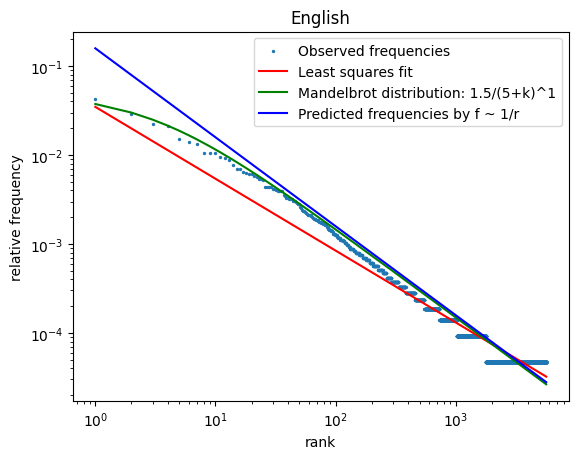

Mean Square Error for German : 8.2e-09


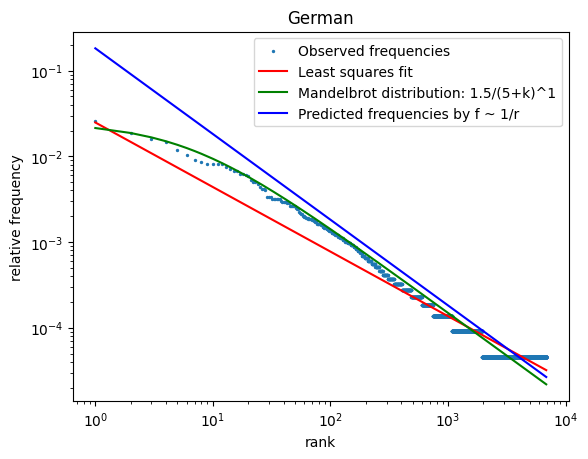

Mean Square Error for Pirates : 1.784e-07


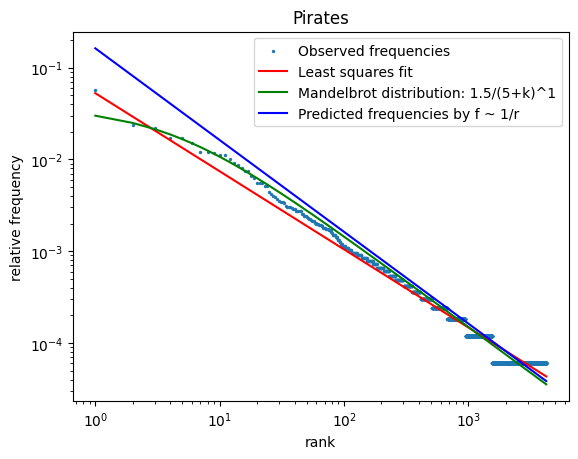

Mean Square Error for Python : 5.8002e-06


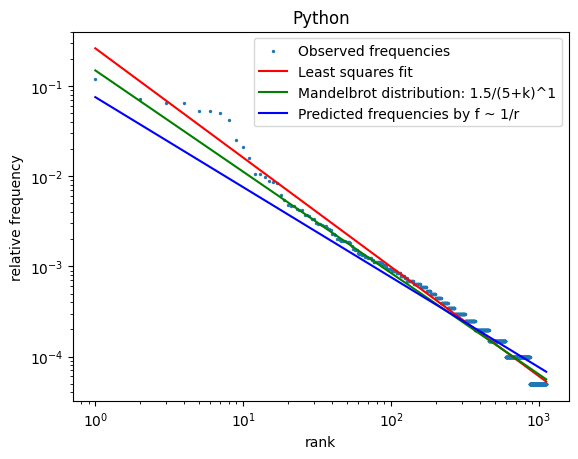

In [98]:
import exercise_2 # resolved reload error
import tokenize
from importlib import reload
from nltk.corpus import webtext

exercise_2 = reload(exercise_2)

# run on English text
with open("data/macbeth_en.txt", "r", encoding="utf-8") as f: # resolved UnicodeDecodeError
    exercise_2.analysis("English", f.read().lower().split())

# run on German text
with open("data/macbeth_de.txt", "r", encoding="utf-8") as f: # resolved UnicodeDecodeError
    exercise_2.analysis("German", f.read().lower().split())

# run on PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST
text = str(webtext.raw("pirates.txt"))
# and call the function as done above
exercise_2.analysis("Pirates", text.lower().split())


# Run on Transformer's trainer module's source code
with open("data/trainer.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    exercise_2.analysis("Python", tokens)

### Answers to exercise 2:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)</br>
$\to$ Yes, each of the texts follows closesly to the best fit line of frequency vs rank on a log-log scale.
3. What are the differences between the languages? What causes them? (1 point)</br>
$\to$ German and English show similar distributions, whereas Python has a large hump in the top 8-10 ranked words, implying the tokens for the top ranked Python words all have fairly similar frequencies, followed by a steep decrease in frequency. These are likely Python keywords, such as "if," "else," "for," "while," etc. which occur frequently in code.
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)</br>
$\to$ The steps are caused by the log-log scale. Closer to the axis, a single step will appear larger, so the difference between frequency 1 and 2 is a lot of height, but there are many words with low frequencies(high rank), so there is a flat level (same frequency) that extends along the rank axis (many words).
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)</br>

Relative frequency MSE calculated against Mandelbrot distribution curve:</br>
- MSE for English : 1.61e-08 $\to$ 0.0000000161</br>
- MSE for German : 8.2e-09 $\to$ 0.0000000082</br>
- MSE for Pirates : 1.784e-07 $\to$ 0.0000001784</br>
- MSE for Python : 5.8002e-06 $\to$ 0.0000058002</br>


# Bonus (2 point)

Repeat exercise 2 but run these two experiments (independent of each other):
 - Don't lowercase anything
 - Use character level tokenization, rather than word level

Please write your own loader similar to the one we provided. For this, you may create a file `bonus.py` and import your code from there in a similar fashion to the above questions.